In [1]:
import random, math
import pandas as pd

In [2]:
data = pd.read_csv("./timeseries/amount.log", sep = ";", header=None, names = ["time","value"], index_col = 'time', parse_dates=True)
data.head()

,value
time,
2018-04-07 10:43:32.735173,90.0
2018-04-07 10:43:32.745919,123.0
2018-04-07 10:43:32.756769,306.0
2018-04-07 10:43:32.767120,96.0
2018-04-07 10:43:32.779127,84.0


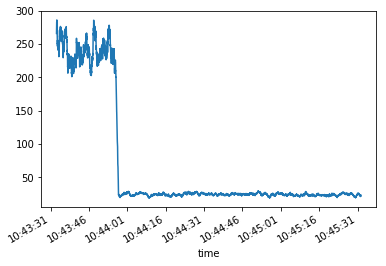

In [5]:
series = data.value
series.rolling(100, center=True).mean().plot()

In [4]:
w1 = []
w2 = []
w1size = 100
w2size = 500
alarmThreshold = 50
for index, value in enumerate(series):
    w1.append(value)
    w2.append(value)
    if (len(w1) < w1size) or (len(w2) < w2size) :
        continue
    mean_w1 = sum(w1[-w1size:])/float(w1size)
    mean_w2 = sum(w2[-w2size:])/float(w2size)
    
    if abs(mean_w1 - mean_w2) > alarmThreshold:
        print("Change detected at time " + str(series.index[index]))
        break

Change detected at time 2018-04-07 10:43:57.296796
